In [1]:
%load_ext autoreload
%autoreload 2
import sys
sys.path.append("../../ukb-dementia-shap/")
ukb_file='../data/ukb50790.tab'

ukb_file2='../data/hamish_preprocessing.csv'

from logic.data_processing.data_setup import *
from logic.analysis.analysis import AnalysisCharts
from pandas.tseries.offsets import DateOffset

ds=data_setup()
an=AnalysisCharts()
dp=data_proc_main()

#ml.path_figures='../figures/'

df=pd.read_parquet('%s%s' % (dp.path,'df_ICD10_20220328.parquet'))
death_df=pd.read_parquet('%s%s' % (dp.path,'deaths.parquet'))
df['eid']=df['eid'].astype(str)
death_df['eid']=death_df['eid'].astype(str)
death_df2=pd.merge(df,death_df,on='eid',how='left')
death_df2.to_parquet(dp.path+'df_ICD10_20220516.parquet')

In [5]:
#dp.dis_date_file(infile='df_ICD10_20220516.parquet',outfile='dis_ohe_icd10_220511.parquet')

In [6]:
df=pd.read_parquet('../PD/data/PD_holdout_20220510.parquet')

In [2]:
df_100=pd.read_csv('../data/hamish_preprocessing.csv',nrows=100)

In [3]:
#braincols_neur=[c for c in df_100.columns if 'mri' in c or 'diabetic_neuropathy' in c ]\
#+['eid','all_over_body_pain_in_last_three_months_and_rating_of_pain_f120022_0_0']

In [4]:
fn=pd.read_csv('../data/fieldnames_full.csv')
mask=pd.notnull(fn['field_type1'])&(fn['field_type1'].str.contains('Mental|mental',regex=True))
mh_cols=list(fn.loc[mask,'col.name'])+['eid']

mask=pd.notnull(fn['field_type1'])&(fn['field_type1'].str.contains('Baseline characteristics'))
bc_cols=['eid']+list(fn.loc[mask,'col.name'])

mask=(fn['field_type3'].str.contains("T1 structural brain MRI"))|\
(fn['field_type3'].str.contains("Diffusion brain MRI"))|\
(fn['field_type3'].str.contains('Arterial spin labelling brain MRI'))|\
(fn['field_type3'].str.contains('Task functional brain MRI'))|\
(fn['field_type3'].str.contains('Resting functional brain MRI'))|\
(fn['field_type3'].str.contains('T2-weighted brain MRI'))



mask_ASL=pd.notnull(fn['field_type3'])&(fn['field_type3'].str.contains('Arterial spin labelling brain MRI'))
mask_task=pd.notnull(fn['field_type3'])&(fn['field_type3'].str.contains('Task functional brain MRI'))

diff_struc_fmri=list(fn.loc[mask,'col.name'])

cols_use=diff_struc_fmri+['eid','all_over_body_pain_in_last_three_months_and_rating_of_pain_f120022_0_0',
                'ever_had_diabetic_neuropathy_f120079_0_0']

In [5]:
varcat_map=dict(zip(fn['col.name'],fn['field_type3']))

In [6]:
mask_mri=pd.notnull(fn['field_type3'])&(fn['field_type3'].str.contains('MRI'))
fn.loc[mask_mri,'field_type3'].value_counts()

 T1 structural brain MRI                         2850
 Diffusion brain MRI                             1350
 Task functional brain MRI                         56
 T1 structural brain MRI                           50
 Susceptibility weighted brain MRI                 36
 Resting functional brain MRI                      28
 Diffusion brain MRI                               14
 Liver MRI                                          9
 T2-weighted brain MRI                              8
 Pancreas MRI                                       7
 Kidney MRI                                         7
 Scout images and configuration for brain MRI       4
 Arterial spin labelling brain MRI                  2
Name: field_type3, dtype: int64

In [7]:
ASL_cols=list(fn.loc[mask_ASL,'col.name'])
task_cols=list(fn.loc[mask_task,'col.name'])

In [8]:
cols_use=diff_struc_fmri+['eid','all_over_body_pain_in_last_three_months_and_rating_of_pain_f120022_0_0',
                          'troubled_by_pain_or_discomfort_present_for_more_than_3_months_f120019_0_0'
                'ever_had_diabetic_neuropathy_f120079_0_0']

In [13]:
df_add=pd.read_csv('../data/hamish_preprocessing.csv',usecols=['eid',\
'troubled_by_pain_or_discomfort_present_for_more_than_3_months_f120019_0_0'])

In [10]:
df_brain_neur=pd.read_csv('../data/hamish_preprocessing.csv',usecols=cols_use)

In [14]:
df_brain_neur=pd.merge(df_brain_neur,df_add,on='eid',how='left')

In [15]:
df_brain_neur.shape

(502411, 4363)

In [16]:
df_brain_neur['troubled_by_pain_or_discomfort_present_for_more_than_3_months_f120019_0_0'].value_counts()

Yes                     94059
No                      72733
Do not know               384
Prefer not to answer       26
Name: troubled_by_pain_or_discomfort_present_for_more_than_3_months_f120019_0_0, dtype: int64

In [17]:
v='all_over_body_pain_in_last_three_months_and_rating_of_pain_f120022_0_0'
v2='troubled_by_pain_or_discomfort_present_for_more_than_3_months_f120019_0_0'
mask=(df_brain_neur[v]>5)&(df_brain_neur[v]<11)
mask2=mask&(df_brain_neur[v2]=="Yes")
df_brain_neur['pain_def']=0
df_brain_neur.loc[mask,'pain_def']=1

df_brain_neur['chronic_pain']=0
df_brain_neur.loc[mask,'chronic_pain']=1

In [94]:
mask=pd.notnull(fn['field_type3'])&(fn['field_type3'].str.contains('metabolomics processing'))
fn.loc[mask,'col.name'].value_counts()

metab_fields=list(fn.loc[mask,'col.name'])+['eid']

In [97]:
metab_fields=['high_lactate_f23652_0_0',
 'high_lactate_f23652_1_0',
 'high_pyruvate_f23653_0_0',
 'low_glucose_f23654_0_0',
 'low_protein_f23655_0_0',
 'low_protein_f23655_1_0','eid']

In [98]:
df_metab=pd.read_csv('../data/hamish_preprocessing.csv',usecols=metab_fields)

In [100]:
df_metab['high_lactate_f23652_0_0'].value_counts()

Yes    15229
Name: high_lactate_f23652_0_0, dtype: int64

In [12]:
df_brain_neur.to_parquet('../Pain/data/df_brain_neur.parquet')

In [101]:
df_brain_neur=pd.read_parquet('../Pain/data/df_brain_neur.parquet')

In [24]:
mask=(df_brain_neur['ever_had_diabetic_neuropathy_f120079_0_0']=="Yes")
mask2=mask&(df_brain_neur['pain_def']==1)
mask3=mask&(df_brain_neur['chronic_pain']==1)

mask_chron_pain=(df_brain_neur['chronic_pain']==1)


brain_cols=[c for c in df_brain_neur.columns if 'eid' not in c and 'neuropathy' not in c
           and 'pain_def' not in c and 'chronic_pain' not in c]

braincols_cat=[varcat_map[c] for c in df_brain_neur.columns if 'eid' not in c and 'neuropathy' not in c
              and 'pain_def' not in c and 'chronic_pain' not in c]

brain_col_counts=[df_brain_neur[c].count() for c in brain_cols ]
brain_col_neur=[df_brain_neur[c][mask].count() for c in brain_cols ]
brain_col_neur_pain=[df_brain_neur[c][mask2].count() for c in brain_cols]
brain_col_neur_chron_pain=[df_brain_neur[c][mask3].count() for c in brain_cols]
brain_col_chron_pain=[df_brain_neur[c][mask_chron_pain].count() for c in brain_cols]

In [25]:
df_poly=pd.DataFrame({'Brain Column':brain_cols,'Category':braincols_cat,'Total Counts':brain_col_counts,\
'Total Diabetic Neuropathy':brain_col_neur,'Total Diabetic Neuropathy w pain >5/10':brain_col_neur_pain,
                     'Total Diabetic Neuropathy w chronic pain':brain_col_neur_chron_pain,
                     'Total overall chronic pain':brain_col_chron_pain})

df_poly.sample(20)

,Brain Column,Category,Total Counts,Total Diabetic Neuropathy,Total Diabetic Neuropathy w pain >5/10,Total Diabetic Neuropathy w chronic pain,Total overall chronic pain
1653,volume_of_grey_matter_in_parahippocampal_gyrus...,T1 structural brain MRI,4622,16,1,1,70
2853,greywhite_contrast_in_frontalpole_left_hemisph...,T1 structural brain MRI,4593,14,1,1,67
4046,area_of_spostcentral_right_hemisphere_f27617_2_0,T1 structural brain MRI,43103,186,13,13,666
1721,volume_of_grey_matter_in_pallidum_left_f25884_3_0,T1 structural brain MRI,4622,16,1,1,70
2530,mean_thickness_of_caudalmiddlefrontal_right_he...,T1 structural brain MRI,43103,186,13,13,666
4359,troubled_by_pain_or_discomfort_present_for_mor...,NaN,167202,1328,182,182,4987
2207,volume_of_mdm_right_hemisphere_f26697_3_0,T1 structural brain MRI,4593,14,1,1,67
76,median_bold_effect_in_groupdefined_mask_for_sh...,Task functional brain MRI,35435,135,2,2,521
1937,volume_of_hippocampus_left_hemisphere_f26562_3_0,T1 structural brain MRI,4593,14,1,1,67
3383,mean_thickness_of_pericalcarine_right_hemisphe...,T1 structural brain MRI,4593,14,1,1,67


In [26]:
df_poly.to_csv('../Pain/data/mri_fields_diabpoly_20220608v3.csv')

In [22]:
df_poly['Category'].value_counts()

 T1 structural brain MRI              2850
 Diffusion brain MRI                  1350
 Task functional brain MRI              56
 T1 structural brain MRI                50
 Resting functional brain MRI           28
 Diffusion brain MRI                    14
 T2-weighted brain MRI                   8
 Arterial spin labelling brain MRI       2
Name: Category, dtype: int64

In [110]:
df_poly.loc[(df_poly['Brain Column'].str.contains('mri'))]

,Brain Column,Total Counts,Total Diabetic Neuropathy,Total Diabetic Neuropathy w pain
1420,discrepancy_between_dmri_brain_image_and_t1_br...,41053,170,8
1421,discrepancy_between_dmri_brain_image_and_t1_br...,4601,16,1
1422,number_of_dmri_outlier_slices_detected_and_cor...,40526,168,8
1423,number_of_dmri_outlier_slices_detected_and_cor...,3409,13,0
1710,increased_search_space_in_eddy_current_estimat...,42788,183,10
1711,increased_search_space_in_eddy_current_estimat...,4622,16,1
1716,intensity_scaling_for_dmri_f25928_2_0,41355,172,8
1717,intensity_scaling_for_dmri_f25928_3_0,4607,16,1


In [9]:
cols_20=[c for c in df_100.columns if df_100[c].count()>20]

In [14]:
df_20=pd.read_csv('../data/hamish_preprocessing.csv',usecols=cols_20)

In [35]:
dtype_df=pd.DataFrame(df_20.dtypes).reset_index()
dtype_df.columns=['column','dtype']
dtype_df['dtype'].value_counts()

float64    1261
object     1237
int64         6
Name: dtype, dtype: int64

In [37]:
obj_cols=list(dtype_df.loc[(dtype_df['dtype']=="object"),'column'])

In [60]:
objcols2=[c for c in obj_cols if not re.search('device|date|chromosome|aliquot|invitation_to_complete',c)]

In [63]:
obj_vals=list([set(df_20.loc[pd.notnull(df_20[c]),c].unique()) for c in objcols2])

In [45]:
disc_dict=dict(zip(obj_cols,set([df_20.loc[pd.notnull(df_20[c]),c].unique() for c in obj_cols])))

TypeError: unhashable type: 'numpy.ndarray'

In [44]:
disc_dict

{'heel_ultrasound_method_f19_0_0': array(['Manual entry', 'Direct entry', 'Not performed'], dtype=object),
 'weight_method_f21_0_0': array(['Direct entry', 'Manual measurement of weight only',
        'Not performed', 'Manual entry of full results',
        'Question not asked due to previous answers'], dtype=object),
 'spirometry_method_f23_0_0': array(['Direct entry', 'Cannot be measured',
        'Not performed - other reason',
        'Not performed - equipment failure'], dtype=object),
 'sex_f31_0_0': array(['Female', 'Male'], dtype=object),
 'was_blood_sampling_attempted_f35_0_0': array(['Yes', 'No'], dtype=object),
 'height_measure_device_id_f39_0_0': array([2028, 2065, 2899, 2878, 2876, 2875, 2882, 2891, 2068, 2870, 2885,
        2883, 2873, 2888, 2896, 2877, 2889, 2890, 2894, 2893, 2880, 2892.0,
        2871.0, 2874.0, 2887.0, 2886.0, 2990.0, 2066.0, 2872.0, 2073.0,
        2026, 2895, 2027, 2076, 2071, 2069.0, 2881.0, 2897.0, 2070, 4756,
        2289.0, 2064.0, 2063.0, 4753, 

In [27]:
fn.loc[fn['col.name'].isin(df_20.columns),'field_type2'].value_counts()

 Hearing test                  311
 Blood biochemistry            150
 Blood count                   124
 Lifestyle and environment     117
 Symbol digit substitution     113
                              ... 
 Addictions                      1
 Cannabis use                    1
 HLA                             1
 Urine sample inventory          1
 Meal type yesterday             1
Name: field_type2, Length: 91, dtype: int64

In [16]:
def import_df(usecols=['eid']):
    df=pd.read_csv(ukb_file2,usecols=usecols)
    return df

In [66]:
mask=(fn['Participants']>300000)&(fn['field_type3'].str.contains('Physical'))
cols_use_phys=['eid']+[c for c in list(fn.loc[mask,'col.name']) if c[len(c)-3]=='0']
df_ukb_phys=pd.read_csv(ukb_file2,usecols=cols_use_phys)

KeyboardInterrupt: 

In [12]:
def extract_cols(df=fn,field='field_type1',string='Mental|mental',exc='xxxx',inc='',min_part=350000):
    
    mask=pd.notnull(df[field])&(df[field].str.contains(string,regex=True))&(df['Participants']>min_part)
    cols=['eid']+list(df.loc[mask,'col.name'])
    
    cols=[c for c in cols if not re.search(exc,c)]
    
    if inc!='':
        cols=['eid']+[c for c in cols if re.search(inc,c)]
    return cols


    

In [17]:
death_df=import_df(usecols=['eid','date_of_death_f40000_0_0','description_of_cause_of_death_f40010_0_0'])

In [18]:
death_df.to_parquet('../data/deaths.parquet')

In [22]:
death_df.loc[pd.notnull(death_df['date_of_death_f40000_0_0']),'death']=1

Ia)Metastatic Breast Cancer                                                                                                                    167
Ia) Metastatic Breast Cancer                                                                                                                    94
Ia)Metastatic Lung Cancer                                                                                                                       84
28 1a. Metastatic Breast Cancer0                                                                                                                80
26 1a. Metastatic Lung Cancer0                                                                                                                  58
                                                                                                                                              ... 
1a) Metastatic Lung Adenocarcinoma                                                                                    

In [14]:
extract_cols(field='Field',string='death',min_part=10)

['eid',
 'fathers_age_at_death_f1807_0_0',
 'fathers_age_at_death_f1807_1_0',
 'fathers_age_at_death_f1807_2_0',
 'fathers_age_at_death_f1807_3_0',
 'mothers_age_at_death_f3526_0_0',
 'mothers_age_at_death_f3526_1_0',
 'mothers_age_at_death_f3526_2_0',
 'mothers_age_at_death_f3526_3_0',
 'nonaccidental_death_in_close_genetic_family_f4501_0_0',
 'nonaccidental_death_in_close_genetic_family_f4501_1_0',
 'nonaccidental_death_in_close_genetic_family_f4501_2_0',
 'nonaccidental_death_in_close_genetic_family_f4501_3_0',
 'thoughts_of_death_during_worst_depression_f20437_0_0',
 'witnessed_sudden_violent_death_f20530_0_0',
 'date_of_death_f40000_0_0',
 'date_of_death_f40000_1_0',
 'underlying_primary_cause_of_death_icd10_f40001_0_0',
 'underlying_primary_cause_of_death_icd10_f40001_1_0',
 'contributory_secondary_ca_f40002_0_1',
 'contributory_secondary_ca_f40002_0_2',
 'contributory_secondary_ca_f40002_0_3',
 'contributory_secondary_ca_f40002_0_4',
 'contributory_secondary_ca_f40002_0_5',
 'co

In [7]:
mask=(fn['col.name'].str.contains('parkin'))&(fn['col.name'].str.contains('g20'))|\
(fn['col.name'].str.contains('date_of_attending_assessment_centre_f53_0_0'))
pd_cols=['eid']+list(fn.loc[mask,'col.name'])

In [23]:
pd_cols

['eid',
 'date_of_attending_assessment_centre_f53_0_0',
 'date_g20_first_reported_parkinsons_disease_f131022_0_0',
 'source_of_report_of_g20_parkinsons_disease_f131023_0_0']

In [24]:
df_pd=pd.read_csv('../data/hamish_preprocessing.csv',usecols=pd_cols)

In [25]:
mask=pd.notnull(df_pd['date_g20_first_reported_parkinsons_disease_f131022_0_0'])
df_pd.loc[mask,].shape

(3968, 4)

In [33]:
df_pd['time_to_disease']=(pd.to_datetime(df_pd['date_g20_first_reported_parkinsons_disease_f131022_0_0'])-\
pd.to_datetime(df_pd['date_of_attending_assessment_centre_f53_0_0'])).dt.days/365

<AxesSubplot:>

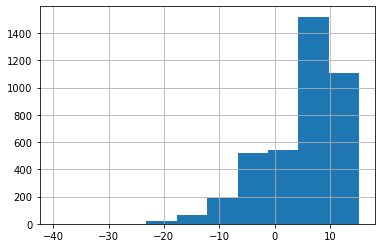

In [35]:
df_pd.loc[mask,'time_to_disease'].hist()

In [36]:
df_pd.to_parquet('../data/pd_labs.parquet')

In [5]:
eth_cols=['eid','ethnic_background_f21000_0_0']
df_eth=pd.read_csv('../data/hamish_preprocessing.csv',usecols=eth_cols)
df_eth.to_parquet('../data/df_eth.parquet')

In [93]:
psych_soc=extract_cols(df=fn,field='field_type2',string='Psychosocial factors',exc='xxxx',inc='',min_part=350000)

In [97]:
df_psych_soc=pd.read_csv('../data/hamish_preprocessing.csv',usecols=psych_soc)

In [125]:
df_psych_soc.to_parquet('../data/df_psych_soc.parquet')

In [194]:
df_psych_soc['neuroticism_score_f20127_0_0']

0         3.0
1         8.0
2         3.0
3         NaN
4         5.0
         ... 
502406    NaN
502407    6.0
502408    3.0
502409    1.0
502410    3.0
Name: neuroticism_score_f20127_0_0, Length: 502411, dtype: float64

In [119]:
str(df_psych_soc['frequency_of_friendfamily_visits_f1031_0_0'].dtype)

'object'

In [120]:
if re.search('o|O',str(df_psych_soc['frequency_of_friendfamily_visits_f1031_0_0'].dtype)):
    print('..')

..


In [124]:
for c in df_psych_soc.columns:
    if c!='eid' and df_psych_soc[c].count()>400000:
        print(c)
        print(df_psych_soc[c].value_counts())

frequency_of_friendfamily_visits_f1031_0_0
About once a week                      176377
2-4 times a week                       152011
About once a month                      66479
Almost daily                            57756
Once every few months                   33148
Never or almost never                    7405
Do not know                              1716
Prefer not to answer                     1563
No friends/family outside household      1305
Name: frequency_of_friendfamily_visits_f1031_0_0, dtype: int64
mood_swings_f1920_0_0
No                      265626
Yes                     222480
Do not know              12437
Prefer not to answer       964
Name: mood_swings_f1920_0_0, dtype: int64
miserableness_f1930_0_0
No                      281456
Yes                     210564
Do not know               8456
Prefer not to answer      1031
Name: miserableness_f1930_0_0, dtype: int64
irritability_f1940_0_0
No                      344017
Yes                     133873
Do not know    

<AxesSubplot:>

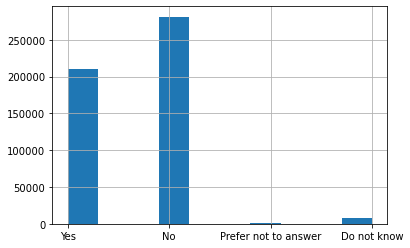

In [104]:
df_psych_soc['miserableness_f1930_0_0'].hist()

In [75]:
list(fn.loc[fn['Participants']>350000,'col.name'])

['verbal_interview_duration_f3_0_0',
 'verbal_interview_duration_f3_1_0',
 'verbal_interview_duration_f3_2_0',
 'verbal_interview_duration_f3_3_0',
 'biometrics_duration_f4_0_0',
 'biometrics_duration_f4_1_0',
 'biometrics_duration_f4_2_0',
 'biometrics_duration_f4_3_0',
 'sample_collection_duration_f5_0_0',
 'sample_collection_duration_f5_1_0',
 'sample_collection_duration_f5_2_0',
 'sample_collection_duration_f5_3_0',
 'conclusion_duration_f6_0_0',
 'conclusion_duration_f6_1_0',
 'conclusion_duration_f6_2_0',
 'conclusion_duration_f6_3_0',
 'weight_method_f21_0_0',
 'weight_method_f21_1_0',
 'weight_method_f21_2_0',
 'weight_method_f21_3_0',
 'spirometry_method_f23_0_0',
 'spirometry_method_f23_1_0',
 'spirometry_method_f23_2_0',
 'spirometry_method_f23_3_0',
 'sex_f31_0_0',
 'year_of_birth_f34_0_0',
 'was_blood_sampling_attempted_f35_0_0',
 'was_blood_sampling_attempted_f35_1_0',
 'was_blood_sampling_attempted_f35_2_0',
 'was_blood_sampling_attempted_f35_3_0',
 'blood_pressure_devic

In [156]:
treat_cols=extract_cols(df=fn,field='field_type1',string='Verbal',exc='xxxx',inc='treatmentmedication_code')

In [164]:
df_treat=import_df(usecols=treat_cols)

In [166]:
df_treat2=pd.melt(df_treat,id_vars='eid')

In [169]:
df_treat2=df_treat2.loc[pd.notnull(df_treat2['value']),]

In [175]:
treat_codes=pd.read_csv('../data/treatment_coding.csv')

In [178]:
treat_codes_dict=dict(zip(treat_codes['coding'],treat_codes['meaning']))

In [181]:
df_treat2['medication']=df_treat2['value'].map(treat_codes_dict)

In [183]:
df_treat2['recs']=df_treat2.groupby('medication')['eid'].transform('count')

In [190]:
df_treat2.loc[df_treat2['recs']>2000,'medication'].value_counts().head(40)

paracetamol                            102187
aspirin                                 73127
ibuprofen                               67441
simvastatin                             64675
omeprazole                              36175
glucosamine product                     34228
bendroflumethiazide                     30104
cod liver oil capsule                   29965
ramipril                                27660
Free-text entry, unable to be coded     26739
amlodipine                              26656
levothyroxine sodium                    24345
atorvastatin                            22359
lansoprazole                            21061
atenolol                                20616
omega-3/fish oil supplement             19879
multivitamins                           16505
metformin                               16247
lisinopril                              15896
ventolin 100micrograms inhaler          15810
co-codamol                              12506
diclofenac                        

In [50]:
bc_cols=extract_cols(df=fn,field='field_type1',string='Baseline char',exc='xxxx')

In [67]:
dense_cols=extract_cols(df=fn,field='field_type1',string='Imaging',exc='believed_safe',inc='density')

In [76]:
phys_cols=extract_cols(df=fn,field='field_type1',string='Physical measures',exc='xxx',inc='')

In [85]:
blood_cols=extract_cols(df=fn,field='field_type1',string='Blood|Urine',
                        exc='missing|date|aliquot|acquisition|device_id|correction|reportability|sample_dilution',inc='')

In [149]:
diet_cols=extract_cols(df=fn,field='field_type1',string='24-hour',exc='xxxx',inc='',min_part=200000)

In [150]:
diet_cols

['eid',
 'number_of_diet_questionnaires_completed_f20077_0_0',
 'when_diet_questionnaire_completion_requested_f20078_0_0',
 'when_diet_questionnaire_completion_requested_f20078_1_0',
 'when_diet_questionnaire_completion_requested_f20078_2_0',
 'when_diet_questionnaire_completion_requested_f20078_3_0',
 'when_diet_questionnaire_completion_requested_f20078_4_0',
 'dayofweek_questionnaire_completion_requested_f20079_0_0',
 'dayofweek_questionnaire_completion_requested_f20079_1_0',
 'dayofweek_questionnaire_completion_requested_f20079_2_0',
 'dayofweek_questionnaire_completion_requested_f20079_3_0',
 'dayofweek_questionnaire_completion_requested_f20079_4_0',
 'dayofweek_questionnaire_completed_f20080_0_0',
 'dayofweek_questionnaire_completed_f20080_1_0',
 'dayofweek_questionnaire_completed_f20080_2_0',
 'dayofweek_questionnaire_completed_f20080_3_0',
 'dayofweek_questionnaire_completed_f20080_4_0',
 'hourofday_questionnaire_completed_f20081_0_0',
 'hourofday_questionnaire_completed_f20081_

In [87]:
df_blood=pd.read_csv('../data/hamish_preprocessing.csv',usecols=blood_cols)

In [95]:
df_blood.to_parquet('../data/ukb_blood.parquet')

In [96]:
df_blood=pd.read_parquet('../data/ukb_blood.parquet')

In [90]:
for c in df_blood.columns:
    print(c,df_blood[c].count())

eid 502411
white_blood_cell_leukocyte_count_f30000_0_0 478080
white_blood_cell_leukocyte_count_f30000_1_0 19409
white_blood_cell_leukocyte_count_f30000_2_0 5863
white_blood_cell_leukocyte_count_freezethaw_cycles_f30001_0_0 474806
red_blood_cell_erythrocyte_count_f30010_0_0 478085
red_blood_cell_erythrocyte_count_f30010_1_0 19408
red_blood_cell_erythrocyte_count_f30010_2_0 5863
red_blood_cell_erythrocyte_count_freezethaw_cycles_f30011_0_0 474811
haemoglobin_concentration_f30020_0_0 478085
haemoglobin_concentration_f30020_1_0 19410
haemoglobin_concentration_f30020_2_0 5863
haemoglobin_concentration_freezethaw_cycles_f30021_0_0 474811
haematocrit_percentage_f30030_0_0 478085
haematocrit_percentage_f30030_1_0 19410
haematocrit_percentage_f30030_2_0 5863
haematocrit_freezethaw_cycles_f30031_0_0 474811
mean_corpuscular_volume_f30040_0_0 478083
mean_corpuscular_volume_f30040_1_0 19410
mean_corpuscular_volume_f30040_2_0 5863
mean_corpuscular_volume_freezethaw_cycles_f30041_0_0 474809
mean_corp

In [68]:
df_dense=pd.read_csv('../data/hamish_preprocessing.csv',usecols=dense_cols)

In [71]:
for c in df_dense.columns:
    print(df_dense[c].count())

4615
9892
38841
1832
38824
1832
7782
40
39429
1901
39409
1901
39348
1898
39348
1898
39330
1898
39429
1901
39404
1901
7782
40
7769
40
39429
1901
39404
1901
14806
366
14806
366
40791
1956
40791
1956
14805
366
14805
366
40790
1956
40790
1956
40791
1956
40791
1956
40790
1956
14805
366
14805
366
40770
1955
40790
1956
14805
366
14805
366
40752
1950
40752
1950
8288
78
40731
1949
40817
1950
8277
78
40817
1950
40788
1949
40817
1950
40796
1949
40791
1949
8288
78


In [31]:
df_bc=pd.read_csv('../data/hamish_preprocessing.csv',usecols=bc_cols)

In [38]:
df_bc.to_parquet('../data/ukb_baseline_char.parquet')

In [45]:
df_bc['townsend_deprivation_index_at_recruitment_f189_0_0'].count()

501788

In [49]:
fn['field_type1'].value_counts()

 Imaging                              4941
 Physical measures                    4725
 Cognitive function                   2281
 First occurrences                    2258
 Diet by 24-hour recall               2171
 Touchscreen                          2072
 Hospital inpatient                   1909
 Blood assays                         1705
 Verbal interview                     1684
 Work environment                     1306
 Cognitive function online             641
 Physical activity measurement         186
 Mental health                         181
 Procedural metrics                    159
 Food (and other) preferences          153
 Experience of pain                    147
 Cancer register                       142
 Genotypes                              86
 Local environment                      85
 Digestive health                       54
 Biological sampling                    52
 Death register                         40
 Algorithmically-defined outcomes       38
 Sample inv

In [18]:
[f for f in os.listdir('../data/') if '.csv' in f]

['code_map2.csv',
 'hamish_preprocessing.csv',
 'cols.csv',
 'ukb_field_names.csv',
 'icd10list_ukb.csv',
 'data_dic.csv',
 'brain_fields_andrew.csv',
 'check.csv',
 'vardict.csv',
 'fieldnames_full.csv',
 'ukb_col_counts.csv']

In [19]:
df=pd.read_csv('../data/hamish_preprocessing.csv',usecols=mh_cols)

In [191]:

df_model=pd.read_parquet(dp.path+'df_all_final2022-04-13.parquet')
df_eth['eid']=df_eth['eid'].astype(str)
df_model=pd.merge(df_model,df_eth,on='eid',how='left')

In [192]:
df_model.columns

Index(['eid', 'worrier_anxious_feelings_f1980_0_0',
       'fracturedbroken_bones_in_last_5_years_f2463_0_0',
       'fedup_feelings_f1960_0_0', 'snoring_f1210_0_0',
       'breastfed_as_a_baby_f1677_0_0',
       'ever_had_bowel_cancer_screening_f2345_0_0',
       'diabetes_diagnosed_by_doctor_f2443_0_0',
       'adopted_as_a_child_f1767_0_0', 'chest_pain_or_discomfort_f2335_0_0',
       ...
       'ipaq_frail', 'frailty_score', 'frailty_index', 'hypertension',
       'alcohol', 'depressed', 'Retired', 'inflammation', 'frailty',
       'ethnic_background_f21000_0_0'],
      dtype='object', length=1749)

In [ ]:
df_eth.to_parquet('../data/')

In [24]:
df_eth['ethnic_background_f21000_0_0'].value_counts()

British                       442517
Any other white background     16327
Irish                          13201
Indian                          5951
Other ethnic group              4557
Caribbean                       4515
African                         3393
Pakistani                       1835
Any other Asian background      1814
Prefer not to answer            1661
Chinese                         1573
Any other mixed background      1031
White and Asian                  830
White and Black Caribbean        619
White                            569
White and Black African          425
Bangladeshi                      236
Do not know                      217
Any other Black background       123
Mixed                             49
Asian or Asian British            43
Black or Black British            27
Name: ethnic_background_f21000_0_0, dtype: int64

In [ ]:
mask=pd.notnull(fn['Field'])&(fn['Field'].str.contains('Ethnic'))
fn.loc[mask,]

In [ ]:
mask=pd.notnull(fn['Field'])&(fn['col.name'].str.contains('21000',regex=True))

fn.loc[mask,]

In [ ]:
tabcol_dict=dict(zip(fn['col.name'],fn['field.tab']))
tabcol_dict_inv=dict(zip(fn['field.tab'],fn['col.name']))

In [ ]:
eth_cols_tab=[tabcol_dict[c] for c in eth_cols]
df_eth=pd.read_csv(ukb_file,sep='\t',usecols=eth_cols_tab)
df_eth.columns=eth_cols
df_eth.to_parquet('../data/df_eth.parquet')

In [ ]:
df_eth['ethnic_background_f21000_0_0'].value_counts()

In [30]:
df=pd.read_feather('../data/0.feather.feather')

In [8]:
df=pd.read_feather('../data/6.feather.feather')

ArrowInvalid: Not a Feather V1 or Arrow IPC file

In [11]:
files=[f for f in os.listdir('../data/') if '.feather.feather' in f and '6' not in f and '3' not in f]

In [12]:
files

['0.feather.feather',
 '1.feather.feather',
 '4.feather.feather',
 '5.feather.feather',
 '2.feather.feather']

In [13]:
df_full=pd.DataFrame([])
for f in files:
    print(f)
    df=pd.read_feather('../data/'+f)
    df=df[[c for c in df.columns if c not in df_full.columns]]
    df_full=pd.concat([df_full,df],axis=1)
    print(df_full.shape)

0.feather.feather
(502411, 999)
1.feather.feather
(502411, 1998)
4.feather.feather
(502411, 2997)
5.feather.feather
(502411, 3996)
2.feather.feather
(502411, 4995)


In [ ]:
df_full.to_feather('../data/ukb_all.feather')

In [6]:
%time
df_full=pd.read_feather('../data/ukb_all.feather')
print(df_full.shape)

CPU times: user 2 µs, sys: 66 µs, total: 68 µs
Wall time: 388 µs
(502411, 999)


In [14]:
df_full.shape

(502411, 4995)